In [216]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [217]:
import matplotlib
pd.__version__,np.__version__,matplotlib.__version__

('2.2.3', '2.1.3', '3.10.0')

In [218]:
df = pd.read_csv('brain_stroke.csv')

In [219]:
df.shape

(4981, 11)

In [220]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4980.000000,4979.000000,4975.000000,4981.000000,4981.000000
mean,43.419859,0.096185,0.055232,105.909795,28.498173,0.049789
std,22.662755,0.294874,0.228455,45.057940,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.195000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.855000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4976 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4980 non-null   float64
 3   heart_disease      4979 non-null   float64
 4   ever_married       4975 non-null   object 
 5   work_type          4971 non-null   object 
 6   Residence_type     4973 non-null   object 
 7   avg_glucose_level  4975 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4976 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 428.2+ KB


In [222]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,NaN,81.0,0.0,0.0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


In [223]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [224]:
df.rename(columns={
    'gender': 'gender',
    'age': 'age',
    'hypertension': 'hyperTen',
    'heart_disease': 'heartDisease',
    'ever_married': 'marriedStatus',
    'work_type': 'workType',
    'Residence_type': 'residenceType',
    'avg_glucose_level': 'avg_glucose',
    'bmi': 'bmi',
    'smoking_status': 'smoker',
    'stroke': 'stroke'
}, inplace=True)

df.columns

Index(['gender', 'age', 'hyperTen', 'heartDisease', 'marriedStatus',
       'workType', 'residenceType', 'avg_glucose', 'bmi', 'smoker', 'stroke'],
      dtype='object')

In [225]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,test_size= 0.3 ,random_state=42)


<Axes: xlabel='hyperTen', ylabel='count'>

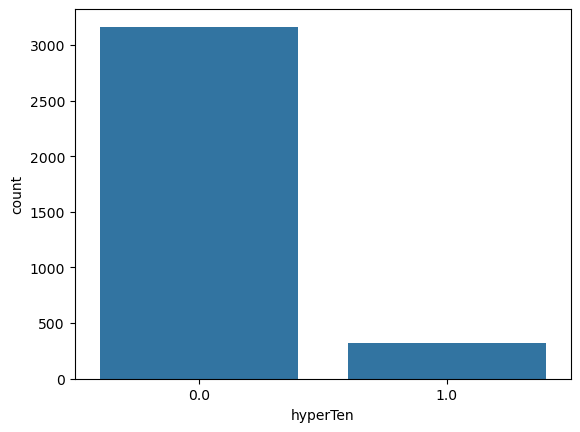

In [226]:
sns.countplot(data=df_train, x="hyperTen")

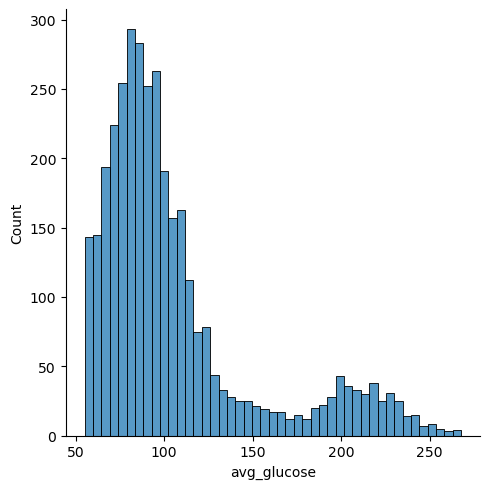

In [227]:
sns.displot(data=df_train, x='avg_glucose')

In [228]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [229]:
df_train['stroke'].value_counts()

stroke
0    3316
1     170
Name: count, dtype: int64

In [230]:
conY = df_train.stroke == 1
conN = df_train.stroke == 0

df_trainY = df_train[conY]
df_trainN = df_train[conN].sample(n = 170, random_state = 999)

df_train = pd.concat([df_trainY, df_trainN])

df_train.stroke.value_counts()

stroke
1    170
0    170
Name: count, dtype: int64

In [231]:
df_train.dtypes

gender            object
age              float64
hyperTen         float64
heartDisease     float64
marriedStatus     object
workType          object
residenceType     object
avg_glucose      float64
bmi              float64
smoker            object
stroke             int64
dtype: object

In [232]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['stroke'] = le.fit_transform(df_train['stroke'])



In [233]:
df_train['hyperTen'] = le.fit_transform(df_train['hyperTen'])
df_test['hyperTen']  = le.transform(df_test['hyperTen'])


In [234]:
df_train['smoker'].unique()

array(['formerly smoked', 'never smoked', 'Unknown', 'smokes', nan],
      dtype=object)

In [235]:
df_train['smoker'] = le.fit_transform(df_train['smoker'])
df_test['smoker']  = le.transform(df_test['smoker'])

In [236]:
df_train['gender'] = le.fit_transform(df_train['gender'])
df_test['gender']  = le.transform(df_test['gender'])

In [237]:
df_train['heartDisease'] = le.fit_transform(df_train['heartDisease'])
df_test['heartDisease']  = le.transform(df_test['heartDisease'])

In [238]:
df_train['marriedStatus'] = le.fit_transform(df_train['marriedStatus'])
df_test['marriedStatus']  = le.transform(df_test['marriedStatus'])

In [239]:
df_train['workType'] = le.fit_transform(df_train['workType'])
df_test['workType']  = le.transform(df_test['workType'])

In [240]:
df_train['residenceType'] = le.fit_transform(df_train['residenceType'])
df_test['residenceType']  = le.transform(df_test['residenceType'])

In [241]:
df_train.drop(columns=['marriedStatus'], inplace=True)
df_train

,gender,age,hyperTen,heartDisease,workType,residenceType,avg_glucose,bmi,smoker,stroke
112,1,76.0,0,0,1,1,140.10,29.9,1,1
56,0,80.0,1,0,2,0,72.67,28.9,2,1
4812,0,80.0,0,0,0,1,110.66,27.3,0,1
63,0,79.0,0,0,1,1,110.85,24.1,1,1
4819,1,71.0,1,0,2,0,87.80,30.8,0,1
...,...,...,...,...,...,...,...,...,...,...
1707,0,47.0,0,0,1,0,75.43,36.4,3,0
4574,0,26.0,0,0,0,1,72.56,35.4,2,0
3129,0,51.0,0,0,1,0,81.73,27.4,2,0
2460,0,18.0,0,0,0,1,90.92,16.0,2,0


<Axes: >

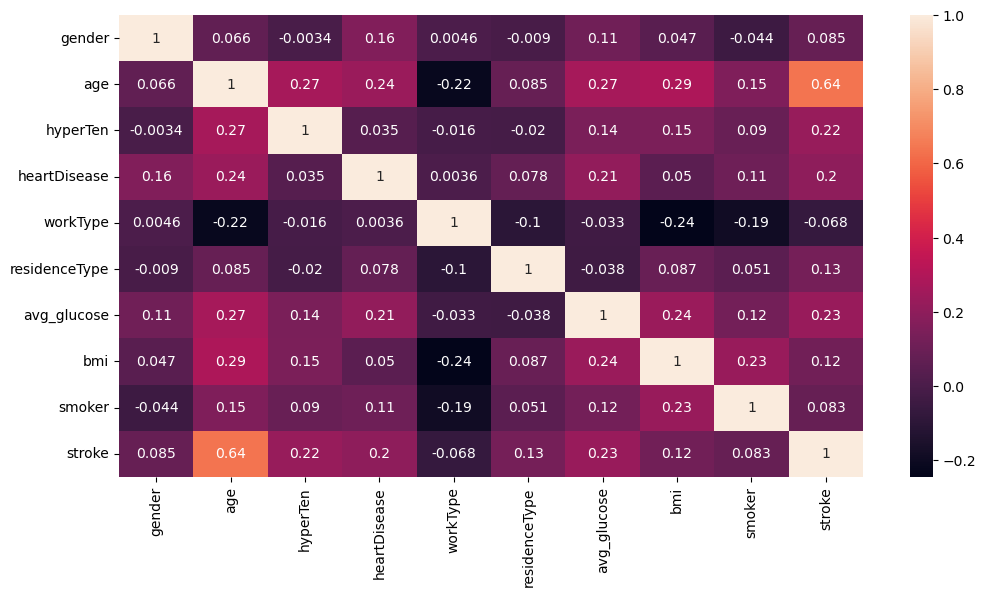

In [242]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(), annot=True)

In [243]:
df_train = df_train[['age','hyperTen','heartDisease','avg_glucose','stroke']]

In [244]:
df_train.isna().sum()

age             0
hyperTen        0
heartDisease    0
avg_glucose     2
stroke          0
dtype: int64

In [245]:
df_train = df_train.dropna()
df_train.isna().sum()

age             0
hyperTen        0
heartDisease    0
avg_glucose     0
stroke          0
dtype: int64

In [246]:
df_train['stroke'].value_counts(normalize=True)

stroke
0    0.502959
1    0.497041
Name: proportion, dtype: float64

In [249]:
df_train['hyperTen'].dtype

dtype('int64')

In [250]:
df_train

,age,hyperTen,heartDisease,avg_glucose,stroke
112,76.0,0,0,140.10,1
56,80.0,1,0,72.67,1
4812,80.0,0,0,110.66,1
63,79.0,0,0,110.85,1
4819,71.0,1,0,87.80,1
...,...,...,...,...,...
1707,47.0,0,0,75.43,0
4574,26.0,0,0,72.56,0
3129,51.0,0,0,81.73,0
2460,18.0,0,0,90.92,0


In [251]:
df_train.shape

(338, 5)

In [252]:
df_train.columns

Index(['age', 'hyperTen', 'heartDisease', 'avg_glucose', 'stroke'], dtype='object')

In [ ]:
# Modeling

X_train = df_train[['age','hyperTen','heartDisease','avg_glucose']]
y_train = df_train['stroke']

X_test = df_test[['age','hyperTen','heartDisease','avg_glucose']]
assert X_train.ndim == 2
assert X_test.ndim  == 2
assert y_train.ndim == 1

print("(samples, features): ", X_train.shape)
print("(samples,         ): ", y_train.shape)
print("(samples, features): ", X_test.shape)

(samples, features):  (338, 4)
(samples,         ):  (338,)
(samples, features):  (1495, 4)


In [ ]:
# Cross Validation
from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability

##Complex
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.svm import SVC  #drawing a line based on maximum distance

lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

# perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv


Scores:  [0.77941176 0.73529412 0.77941176 0.82089552 0.79104478] - Scores mean:  0.7812115891132572 - Scores std (lower better):  0.027518717442863196
Scores:  [0.77941176 0.69117647 0.73529412 0.85074627 0.71641791] - Scores mean:  0.7546093064091308 - Scores std (lower better):  0.05605865026992548
Scores:  [0.77941176 0.72058824 0.79411765 0.85074627 0.73134328] - Scores mean:  0.7752414398595259 - Scores std (lower better):  0.04688006585548828


In [266]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=999)  #<----this is the model I choose, after cross validation

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  #this is listed in the sklearn website

#add more parameters here
#param_grid[parameter] = list of parameters to search

#refit means it will pick the best model, and fit again, so it means grid is already the best model after this line
grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)
#scoring = f1, recall, precision, accuracy

#fit the grid, which will basically do cross validation across all combinatiosn, here we only have 3 comb
grid.fit(X_train, y_train)  #remember to use only training set here....

#print the best parameters and accuracy
# print(grid.best_params_)
# print(grid.best_score_)
print(grid.cv_results_)

{'mean_fit_time': array([0.00340219, 0.00274634, 0.00097589]), 'std_fit_time': array([6.02755353e-04, 9.56212481e-05, 1.60414427e-05]), 'mean_score_time': array([0.00081944, 0.00071726, 0.00068631]), 'std_score_time': array([1.18372940e-04, 1.89518627e-05, 4.54480097e-05]), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear'],
             mask=[False, False, False],
       fill_value=np.str_('?'),
            dtype=object), 'params': [{'solver': 'newton-cg'}, {'solver': 'lbfgs'}, {'solver': 'liblinear'}], 'split0_test_score': array([0.77941176, 0.77941176, 0.77941176]), 'split1_test_score': array([0.73529412, 0.73529412, 0.75      ]), 'split2_test_score': array([0.77941176, 0.77941176, 0.80882353]), 'split3_test_score': array([0.82089552, 0.82089552, 0.8358209 ]), 'split4_test_score': array([0.79104478, 0.79104478, 0.76119403]), 'mean_test_score': array([0.78121159, 0.78121159, 0.78705004]), 'std_test_score': array([0.02751872, 0.02751872, 0.03147146]), 'rank_test_sco

In [ ]:
#confusion matrix 
'''
T = True, F = False
P = Positive, N = Negative
'''

''' 
                        Actual
                    P               N
             P     TP              FP
predict   
             N     FN              TN
'''


' \n                        Actual\n                    P               N\n             P     TP              FP\npredict   \n             N     FN              TN\n'

0.8333333333333334
0.75
1.0
0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



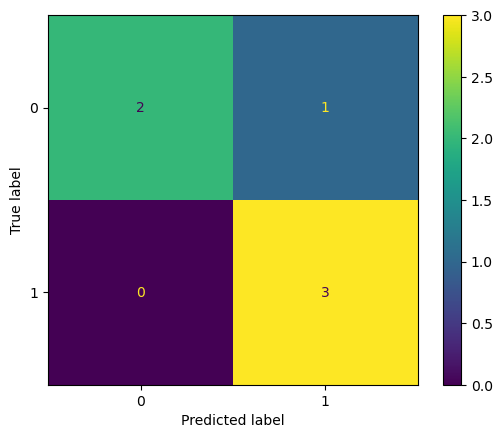

In [ ]:
#0 here is negative
#1 here is positive

y     = [0, 0, 1, 1, 0, 1]
ypred = [1, 0, 1, 1, 0, 1]

#accuracy = (TP + TN) / (TP + FP + FN + TN)
#accuracy = 3 + 2  /  6 = 5 / 6 = 83%

#but accuracy is NOT good if your data is imbalanced (see actual y)

#recall, precision, f1-score
#recall = TP  / (TP + FN)
#recall = 3   / (3  + 0) = 100%  Recall is used when you don't like FN, e.g., critical - cancer, zombie, terrorists

#precision = TP / (TP + FP)
#precision = 3 /  (3 + 1) = 75% Precision is used when you don't like FP, e.g., search engine

#f1-score = 2 * ( (recall * precision) / (precision + recall) )
        #when precision and recall are both important.....
        #   2 * ( (1      * 0.75)     /   (0.75     +    1  ) )
        
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#if you want all in one table
from sklearn.metrics import classification_report

#if you want the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#format (ytrue, ypred)
print(accuracy_score(y, ypred))
print(precision_score(y, ypred))
print(recall_score(y, ypred))
print(f1_score(y, ypred))

print(classification_report(y, ypred))

cm = confusion_matrix(y, ypred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()

# #for regression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [271]:
X_test.isna().sum()

age             0
hyperTen        0
heartDisease    0
avg_glucose     2
dtype: int64

In [283]:
X_test =  X_test.dropna()

In [284]:
X_test.isna().sum()

age             0
hyperTen        0
heartDisease    0
avg_glucose     0
dtype: int64

In [ ]:
pred_y = grid.predict(X_test)

print(pred_y)

In [286]:
fake_y_test = np.random.randint(0, 2, size = (pred_y.shape))

In [287]:
accuracy_score(fake_y_test, pred_y)

0.5003348961821835

In [288]:
grid.best_estimator_

LogisticRegression(random_state=999, solver='liblinear')

In [ ]:
grid.best_estimator_.coef_

array([[7.22479457e-02, 3.75645963e-01, 4.77243905e-01, 2.41654825e-05]])

<Axes: ylabel='features'>

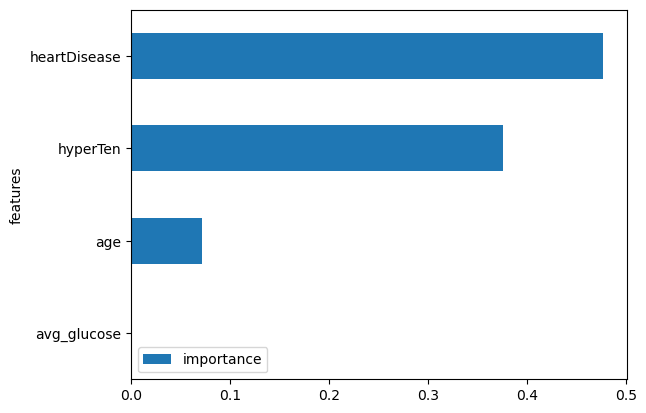

In [290]:
feature_importance = pd.DataFrame(['age','hyperTen','heartDisease','avg_glucose'], 
                                  columns=['features'])
feature_importance["importance"] = grid.best_estimator_.coef_[0]

feature_importance = feature_importance.sort_values(by = ['importance'], ascending=True)

feature_importance.plot.barh(x='features', y='importance')

In [291]:
import pickle

# save the model
filename = 'model/brainStrokePrediction.pkl' 
pickle.dump(grid, open(filename,'wb'))

# Load the model
loaded_grid=pickle.load(open(filename,'rb'))

In [298]:
df_train[['age','hyperTen','heartDisease','avg_glucose', 'stroke']].loc[1]

age              80.00
hyperTen          0.00
heartDisease      1.00
avg_glucose     105.92
stroke            1.00
Name: 1, dtype: float64

In [301]:
sample = np.array([[80, 0, 1, 105]])

In [303]:
predicted_stroke= loaded_grid.predict(sample)
predicted_stroke

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [260]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# X_train['hyperTen'] = le.fit_transform(X_train['hyperTen'])


In [261]:
# X_train['gender'] = le.fit_transform(X_train['gender'])
# X_test['gender']  = le.transform(X_test['gender'])